# QUESTION 1 :- Forest Fire

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
fire=pd.read_csv('forestfires.csv')
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


<function matplotlib.pyplot.show(close=None, block=None)>

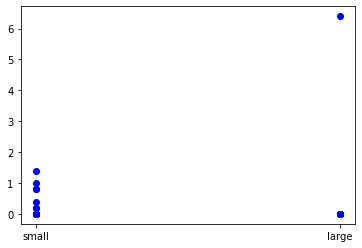

In [5]:
import matplotlib.pyplot as plt
plt.plot(fire['size_category'],fire['rain'],'bo')
plt.show

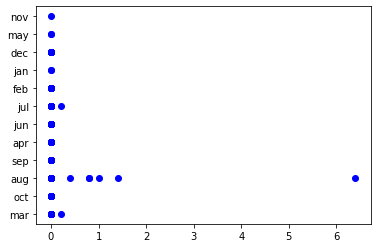

In [11]:
plt.plot(fire['rain'],fire['month'],'bo')

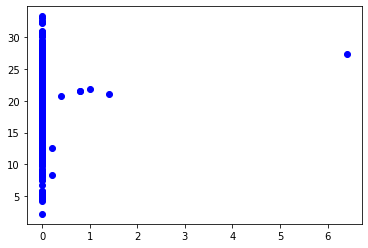

In [47]:
plt.plot(fire['rain'],fire['temp'],'bo')

In [12]:
data=fire.values

In [13]:
x=data[:,2:-1]
y=data[:,-1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [16]:
clf=SVC()
params_grid=[{'kernel':['rbf'],'gamma':[50,25,10,5,1],'C':[10,9,8,7,6,5,4,3,2,1]}]
gsv=GridSearchCV(clf,params_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
                          'gamma': [50, 25, 10, 5, 1], 'kernel': ['rbf']}])

In [17]:
gsv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [18]:
clf=SVC(C=10,gamma=1)                         # Radial Bias Method
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy :',acc)
confusion_matrix(y_test,y_pred)

Accuracy : 0.6794871794871795


array([[  0,  50],
       [  0, 106]], dtype=int64)

In [19]:
clf=SVC(kernel='linear',C=10,gamma=1)                         # Linear Method
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy :',acc)
confusion_matrix(y_test,y_pred)

Accuracy : 0.9935897435897436


array([[ 50,   0],
       [  1, 105]], dtype=int64)

In [20]:
clf=SVC(kernel='poly',C=10,gamma=1)                         # Poly Method
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy :',acc)
confusion_matrix(y_test,y_pred)

Accuracy : 0.967948717948718


array([[ 47,   3],
       [  2, 104]], dtype=int64)

In [21]:
clf=SVC(kernel='sigmoid',C=10,gamma=1)                         # Sigmoid Method
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy :',acc)
confusion_matrix(y_test,y_pred)

Accuracy : 0.6794871794871795


array([[  0,  50],
       [  0, 106]], dtype=int64)

# Question 2 :- Salary Data

In [2]:
salary_train=pd.read_csv('SalaryData_Train(1).csv')
salary_test=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


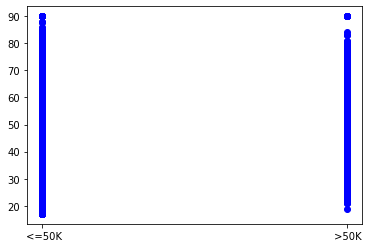

In [25]:
plt.plot(salary_train['Salary'],salary_train['age'],'bo')

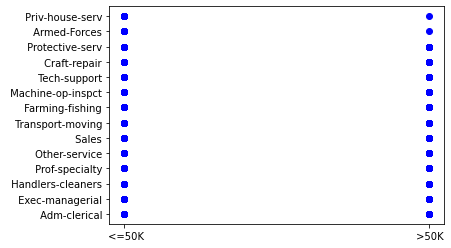

In [27]:
plt.plot(salary_train['Salary'],salary_train['occupation'],'bo')

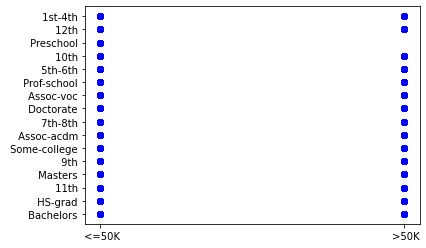

In [28]:
plt.plot(salary_train['Salary'],salary_train['education'],'bo')

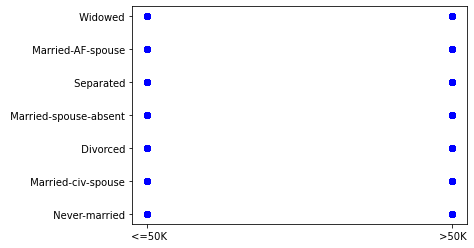

In [29]:
plt.plot(salary_train['Salary'],salary_train['maritalstatus'],'bo')

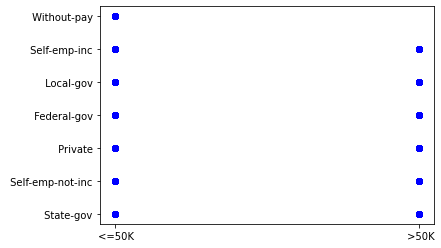

In [30]:
plt.plot(salary_train['Salary'],salary_train['workclass'],'bo')

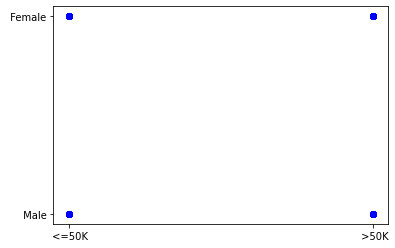

In [26]:
plt.plot(salary_train['Salary'],salary_train['sex'],'bo')

In [4]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


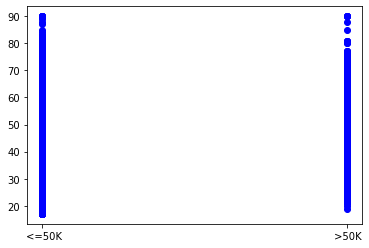

In [32]:
plt.plot(salary_test['Salary'],salary_test['age'],'bo')

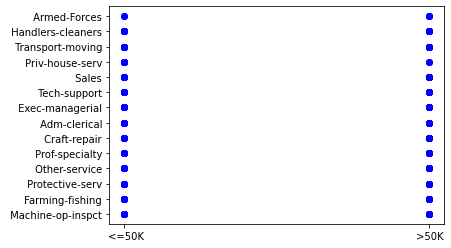

In [34]:
plt.plot(salary_test['Salary'],salary_test['occupation'],'bo')

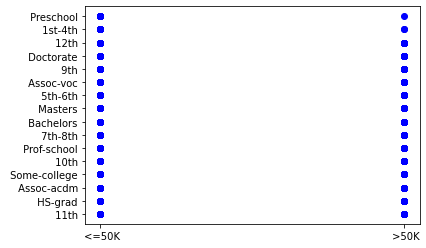

In [35]:
plt.plot(salary_test['Salary'],salary_test['education'],'bo')

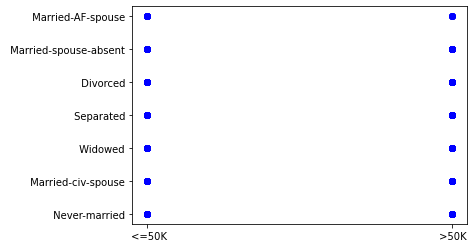

In [36]:
plt.plot(salary_test['Salary'],salary_test['maritalstatus'],'bo')

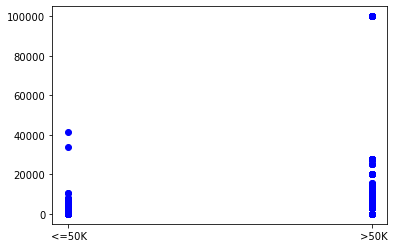

In [37]:
plt.plot(salary_test['Salary'],salary_test['capitalgain'],'bo')

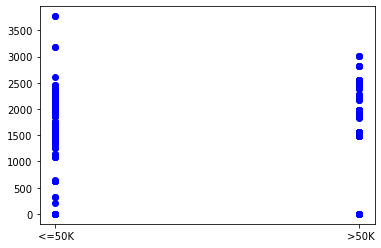

In [38]:
plt.plot(salary_test['Salary'],salary_test['capitalloss'],'bo')

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
salary_train['workclass']=label_encoder.fit_transform(salary_train['workclass'])
salary_train['education']=label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus']=label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']=label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship']=label_encoder.fit_transform(salary_train['relationship'])
salary_train['race']=label_encoder.fit_transform(salary_train['race'])
salary_train['sex']=label_encoder.fit_transform(salary_train['sex'])
salary_train['native']=label_encoder.fit_transform(salary_train['native'])
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [5]:
salary_test['workclass']=label_encoder.fit_transform(salary_test['workclass'])
salary_test['education']=label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']=label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']=label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']=label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']=label_encoder.fit_transform(salary_test['race'])
salary_test['sex']=label_encoder.fit_transform(salary_test['sex'])
salary_test['native']=label_encoder.fit_transform(salary_test['native'])
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [6]:
x_train_2=salary_train.iloc[:,0:13]
y_train_2=salary_train.iloc[:,13]
x_test_2=salary_test.iloc[:,0:13]
y_test_2=salary_test.iloc[:,13]

In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
x_train_2 = norm_func(x_train_2)
x_test_2 =  norm_func(x_test_2)

In [8]:
model_linear = SVC(kernel = 'linear',gamma=50,C=10)   # Linear
model_linear.fit(x_train_2,y_train_2)

SVC(C=10, gamma=50, kernel='linear')

In [9]:
y_pred=model_linear.predict(x_test_2)
acc=accuracy_score(y_test_2,y_pred)
confusion_matrix(y_test_2,y_pred)
print('Accuracy:',acc)

Accuracy: 0.8085657370517928


In [10]:
model_rad= SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)      # Radial Bias
model_rad.fit(x_train_2,y_train_2)
y_pred=model_rad.predict(x_test_2)
acc=accuracy_score(y_test_2,y_pred)
confusion_matrix(y_test_2,y_pred)
print('Accuracy:',acc)

Accuracy: 0.8280876494023904


In [ ]:
model_poly= SVC(kernel = "poly",random_state=40,gamma=50,C=10)     #Polynomial
model_poly.fit(x_train_2,y_train_2)
y_pred=model_poly.predict(x_test_2)
acc=accuracy_score(y_test_2,y_pred)
confusion_matrix(y_test_2,y_pred)
print('Accuracy:',acc)

In [35]:
model_sigmoid= SVC(kernel = "sigmoid",random_state=40,gamma=50,C=10)    # Sigmoid
model_sigmoid.fit(x_train_2,y_train_2)
y_pred=model_sigmoid.predict(x_test_2)
acc=accuracy_score(y_test_2,y_pred)
confusion_matrix(y_test_2,y_pred)
print('Accuracy:',acc)

Accuracy: 0.7543160690571049


In [30]:
clf=SVC()
params_grid=[{'kernel':['rbf'],'gamma':[50,25,10,5,1],'C':[10,9,8,7,6,5,4,3,2,1]}]
gsv=GridSearchCV(clf,params_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_

{'C': 10, 'gamma': 50, 'kernel': 'rbf'}